# **Importing Modules**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from xgboost import XGBRegressor

import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential

# import keras
# from keras import layers

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# print(tf.__version__)
# print(tf.keras.__version__)

# **Importing Datasets**

In [4]:
# data = pd.read_csv('/content/drive/MyDrive/colab_projects/project_walmart/datasets/train.csv')
# stores = pd.read_csv('/content/drive/MyDrive/colab_projects/project_walmart/datasets/stores.csv')
# features = pd.read_csv('/content/drive/MyDrive/colab_projects/project_walmart/datasets/features.csv')

data = pd.read_csv('datasets/train.csv')
stores = pd.read_csv('datasets/stores.csv')
features = pd.read_csv('datasets/features.csv')

**Training Dataset**

In [5]:
data.shape

(421570, 5)

In [6]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


**Dataset containing info of Stores**

In [8]:
stores.shape

(45, 3)

In [9]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [10]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


**Dataset containing additional data of Stores**

In [11]:
features.shape

(8190, 12)

In [12]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Handling missing values of features dataset**

In [14]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [15]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [16]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Merging Training Dataset and merged stores-features Dataset**

In [17]:
data = pd.merge(data,stores,on='Store',how='left')
data = pd.merge(data,features,on=['Store','Date'],how='left')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)

In [18]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
379648,40,87,2012-10-26,24638.96,False,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False
181170,19,30,2012-10-26,3740.12,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False
181313,19,31,2012-10-26,3128.17,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False
181599,19,33,2012-10-26,5740.14,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421570 n

In [20]:
data.set_index(data.Date, inplace=True)

In [21]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [22]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [23]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


# **Splitting Date Column**

In [24]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

In [25]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

# **Outlier Detection and Abnormalities**

**Outliers**

In [27]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [28]:
agg_data

,Store,Dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22513.322937,18535.480,9854.349032
1,1,2,65615.36,35819.83,46102.090420,45561.850,3440.673222
2,1,3,51159.17,6165.73,13150.478042,10366.850,8708.978853
3,1,4,47893.23,32497.43,36964.154476,36579.960,2930.698313
4,1,5,85676.09,11570.27,24257.941119,21183.420,11330.286495
...,...,...,...,...,...,...,...
3326,45,94,7639.88,0.98,3690.272090,4120.155,1852.287364
3327,45,95,75204.77,41131.42,52896.166643,52417.470,5117.961708
3328,45,96,3.00,2.94,2.970000,2.970,0.042426
3329,45,97,8765.09,4935.60,6466.961888,6470.520,659.739542


In [29]:
agg_data[agg_data['std'].isnull()]

,Store,Dept,max,min,mean,median,std
211,3,78,6.00,6.00,6.00,6.00,NaN
216,3,83,19.33,19.33,19.33,19.33,NaN
264,4,39,1.56,1.56,1.56,1.56,NaN
362,5,78,6.00,6.00,6.00,6.00,NaN
512,7,78,12.00,12.00,12.00,12.00,NaN
529,7,99,15.00,15.00,15.00,15.00,NaN
738,10,77,1590.00,1590.00,1590.00,1590.00,NaN
908,12,99,29.88,29.88,29.88,29.88,NaN
949,13,43,1.07,1.07,1.07,1.07,NaN
969,13,77,1272.00,1272.00,1272.00,1272.00,NaN


In [30]:
agg_data.head()

,Store,Dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,2,65615.36,35819.83,46102.090420,45561.85,3440.673222
2,1,3,51159.17,6165.73,13150.478042,10366.85,8708.978853
3,1,4,47893.23,32497.43,36964.154476,36579.96,2930.698313
4,1,5,85676.09,11570.27,24257.941119,21183.42,11330.286495


In [31]:
agg_data.tail()

,Store,Dept,max,min,mean,median,std
3326,45,94,7639.88,0.98,3690.272090,4120.155,1852.287364
3327,45,95,75204.77,41131.42,52896.166643,52417.470,5117.961708
3328,45,96,3.00,2.94,2.970000,2.970,0.042426
3329,45,97,8765.09,4935.60,6466.961888,6470.520,659.739542
3330,45,98,1504.71,2.00,561.239037,619.410,371.286705


In [32]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Store   3331 non-null   int64  
 1   Dept    3331 non-null   int64  
 2   max     3331 non-null   float64
 3   min     3331 non-null   float64
 4   mean    3331 non-null   float64
 5   median  3331 non-null   float64
 6   std     3294 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 182.3 KB


In [33]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')

In [34]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  IsHoliday     421

In [35]:
store_data.dropna(inplace=True)
# store_data

In [36]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421533 entries, 0 to 421569
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421533 non-null  int64         
 1   Dept          421533 non-null  int64         
 2   Date          421533 non-null  datetime64[ns]
 3   Weekly_Sales  421533 non-null  float64       
 4   Type          421533 non-null  object        
 5   Size          421533 non-null  int64         
 6   Temperature   421533 non-null  float64       
 7   Fuel_Price    421533 non-null  float64       
 8   MarkDown1     421533 non-null  float64       
 9   MarkDown2     421533 non-null  float64       
 10  MarkDown3     421533 non-null  float64       
 11  MarkDown4     421533 non-null  float64       
 12  MarkDown5     421533 non-null  float64       
 13  CPI           421533 non-null  float64       
 14  Unemployment  421533 non-null  float64       
 15  IsHoliday     421533 n

In [37]:
data = store_data
del store_data

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421533 entries, 0 to 421569
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421533 non-null  int64         
 1   Dept          421533 non-null  int64         
 2   Date          421533 non-null  datetime64[ns]
 3   Weekly_Sales  421533 non-null  float64       
 4   Type          421533 non-null  object        
 5   Size          421533 non-null  int64         
 6   Temperature   421533 non-null  float64       
 7   Fuel_Price    421533 non-null  float64       
 8   MarkDown1     421533 non-null  float64       
 9   MarkDown2     421533 non-null  float64       
 10  MarkDown3     421533 non-null  float64       
 11  MarkDown4     421533 non-null  float64       
 12  MarkDown5     421533 non-null  float64       
 13  CPI           421533 non-null  float64       
 14  Unemployment  421533 non-null  float64       
 15  IsHoliday     421533 n

In [39]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [40]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421533 entries, 2010-02-05 to 2012-10-26
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           421533 non-null  int64         
 1   Dept            421533 non-null  int64         
 2   Date            421533 non-null  datetime64[ns]
 3   Weekly_Sales    421533 non-null  float64       
 4   Type            421533 non-null  object        
 5   Size            421533 non-null  int64         
 6   Temperature     421533 non-null  float64       
 7   Fuel_Price      421533 non-null  float64       
 8   CPI             421533 non-null  float64       
 9   Unemployment    421533 non-null  float64       
 10  IsHoliday       421533 non-null  bool          
 11  Year            421533 non-null  int32         
 12  Month           421533 non-null  int32         
 13  Week            421533 non-null  UInt32        
 14  max             4215

In [42]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [43]:
data_numeric

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown
Date,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0.00
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0.00
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0.00
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0.00
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0.00
...,...,...,...,...,...,...,...
2012-10-26,9258.88,202307,69.79,3.506,223.078337,6.170,9678.80
2012-10-26,53.12,39690,65.95,4.301,131.193097,10.199,502.88
2012-10-26,5339.65,204184,58.99,4.071,142.762411,8.000,10969.27


In [44]:
data.shape

(421533, 20)

In [45]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(375438, 20)

**Negative Weekly Sales**

In [46]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]

In [47]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1191 entries, 2010-02-05 to 2012-10-26
Series name: Weekly_Sales
Non-Null Count  Dtype  
--------------  -----  
1191 non-null   float64
dtypes: float64(1)
memory usage: 18.6 KB


In [48]:
y.head()

Date
2010-02-05   -15.00
2010-02-05   -59.00
2010-02-05    -2.45
2010-02-05    -0.04
2010-02-05   -12.00
Name: Weekly_Sales, dtype: float64

In [49]:
y.nunique()

648

In [50]:
y.value_counts()

Weekly_Sales
-15.00     26
-5.00      23
-2.00      18
-10.00     16
-3.00      15
           ..
-499.00     1
-73.74      1
-53.20      1
-206.00     1
-178.15     1
Name: count, Length: 648, dtype: int64

In [51]:
max(y.value_counts())

26

In [52]:
# sns.displot(y,height=6,aspect=2)
# plt.title("Negative Weekly Sales", fontsize=15)
# plt.savefig('plots/negative_weekly_sales.png')

# plt.show()

In [53]:
data=data[data['Weekly_Sales']>=0]

In [54]:
data.shape

(374247, 20)

In [55]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

In [56]:
# data.to_csv('/content/drive/MyDrive/colab_projects/project_walmart/datasets/preprocessed_walmart_dataset.csv')
data.to_csv('datasets/preprocessed_walmart_dataset.csv')

# **Data Visuallizations**

**Average Monthly Sales**

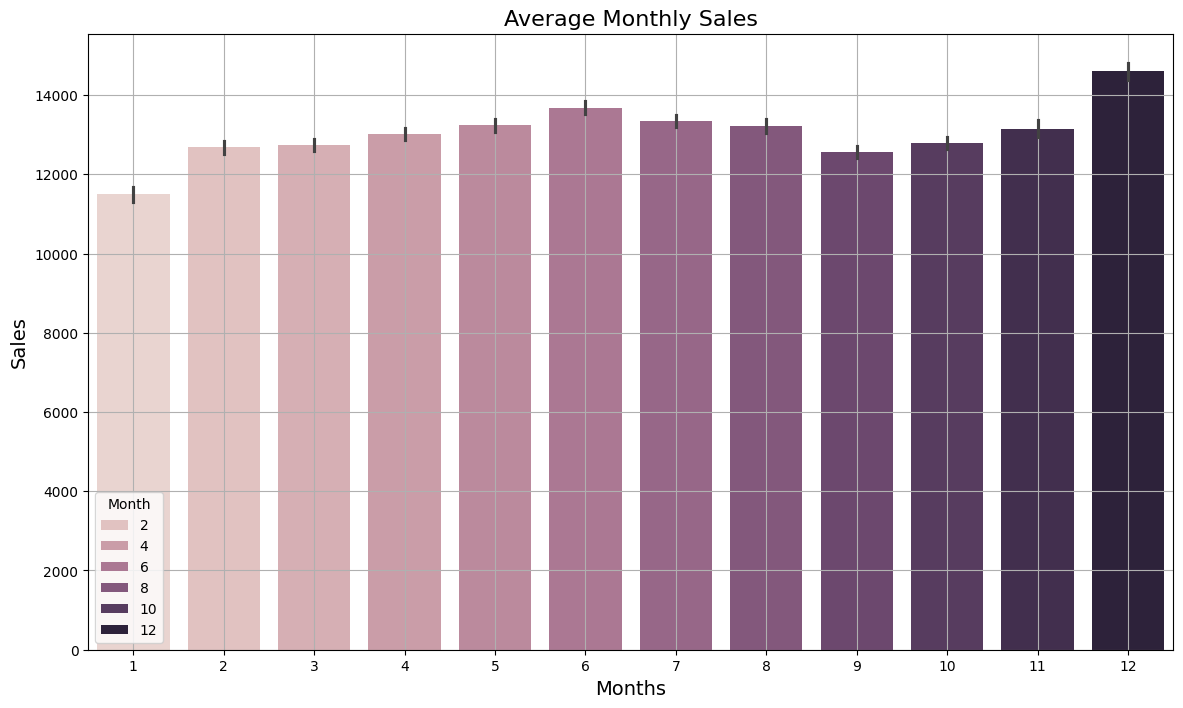

In [57]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data, hue='Month')
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.savefig('plots/avg_monthly_sales.png')
plt.grid()

**Monthly Sales for Each Year**

In [58]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


In [59]:
data_monthly.index.tolist()

[2010, 2011, 2012]

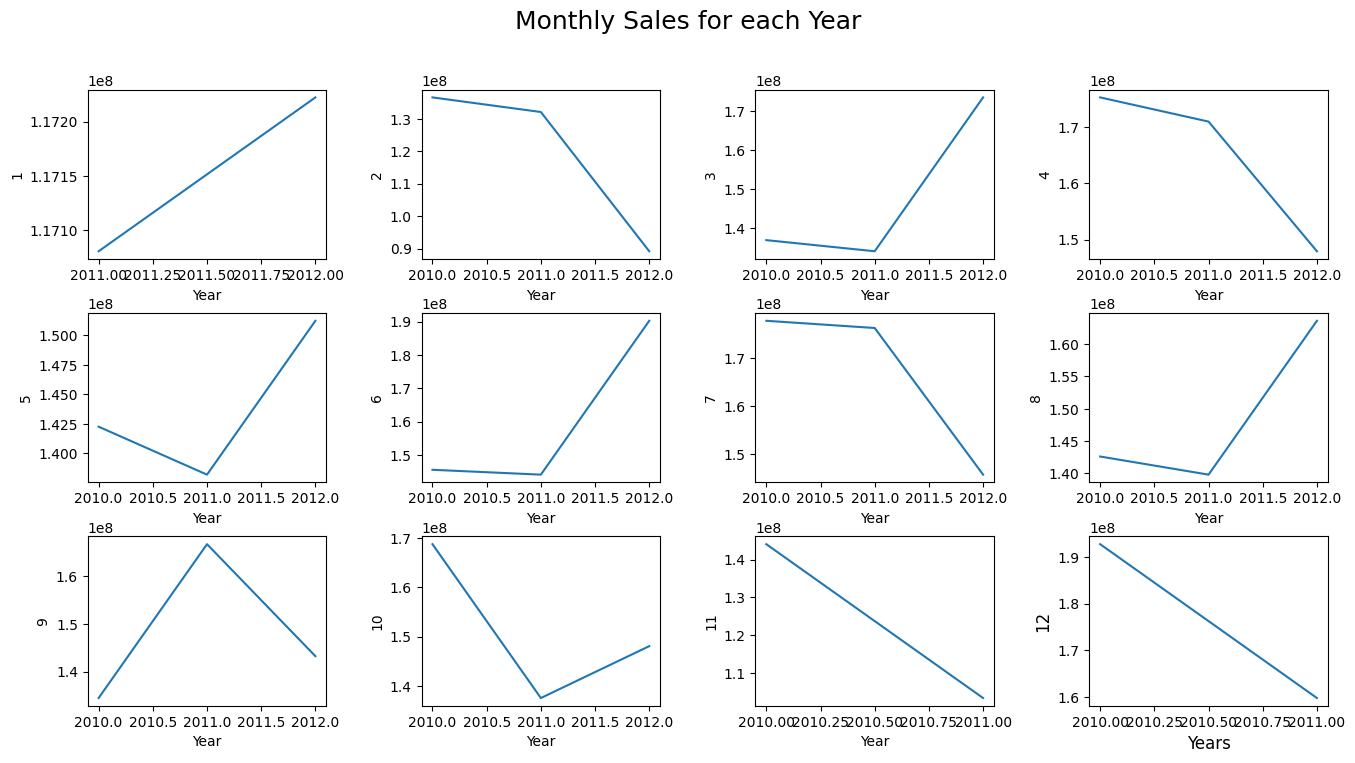

In [60]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j], data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.savefig('plots/monthly_sales_every_year.png')
plt.show()

**Average Weekly Sales Store wise**

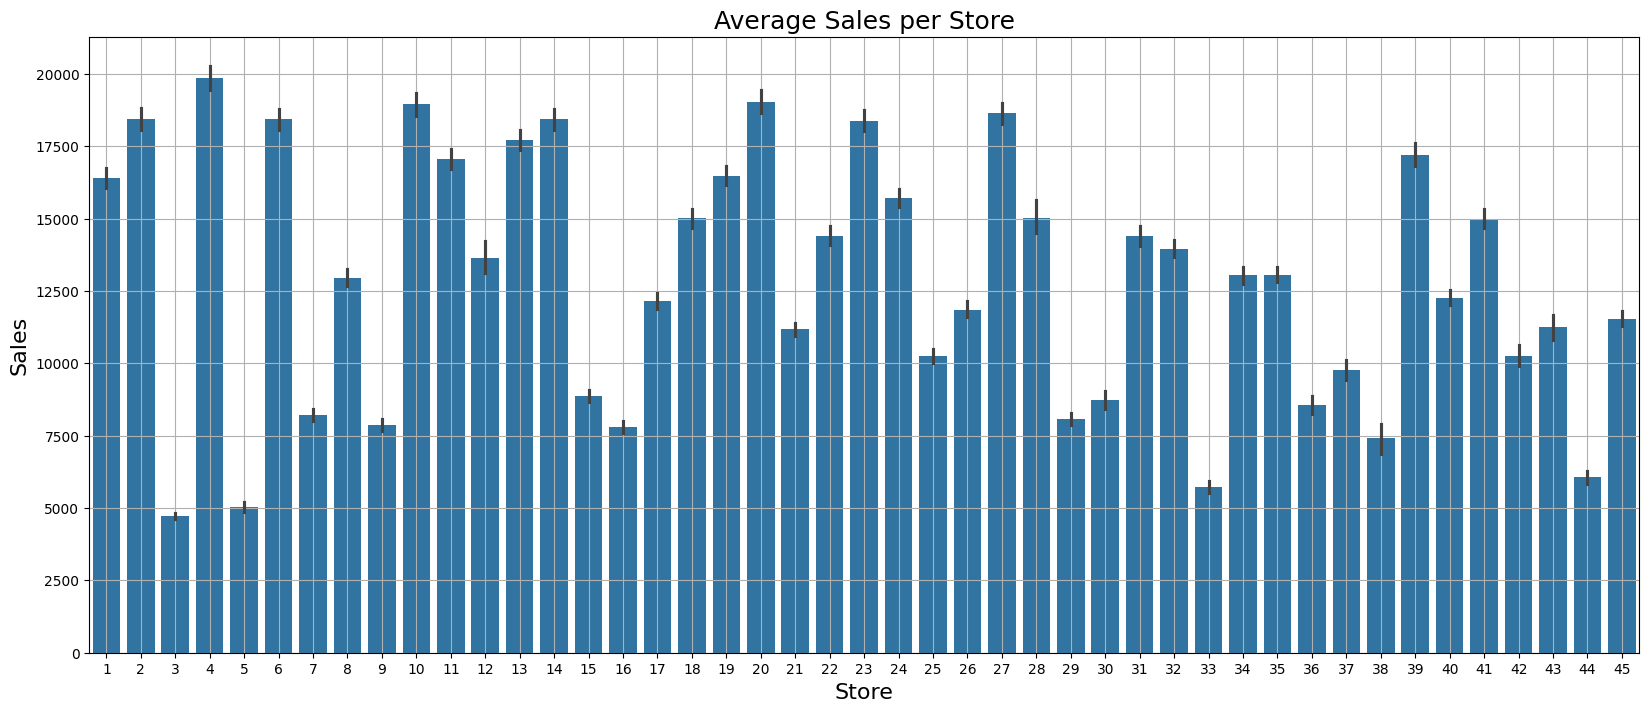

In [61]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('plots/avg_sales_store.png')
plt.show()

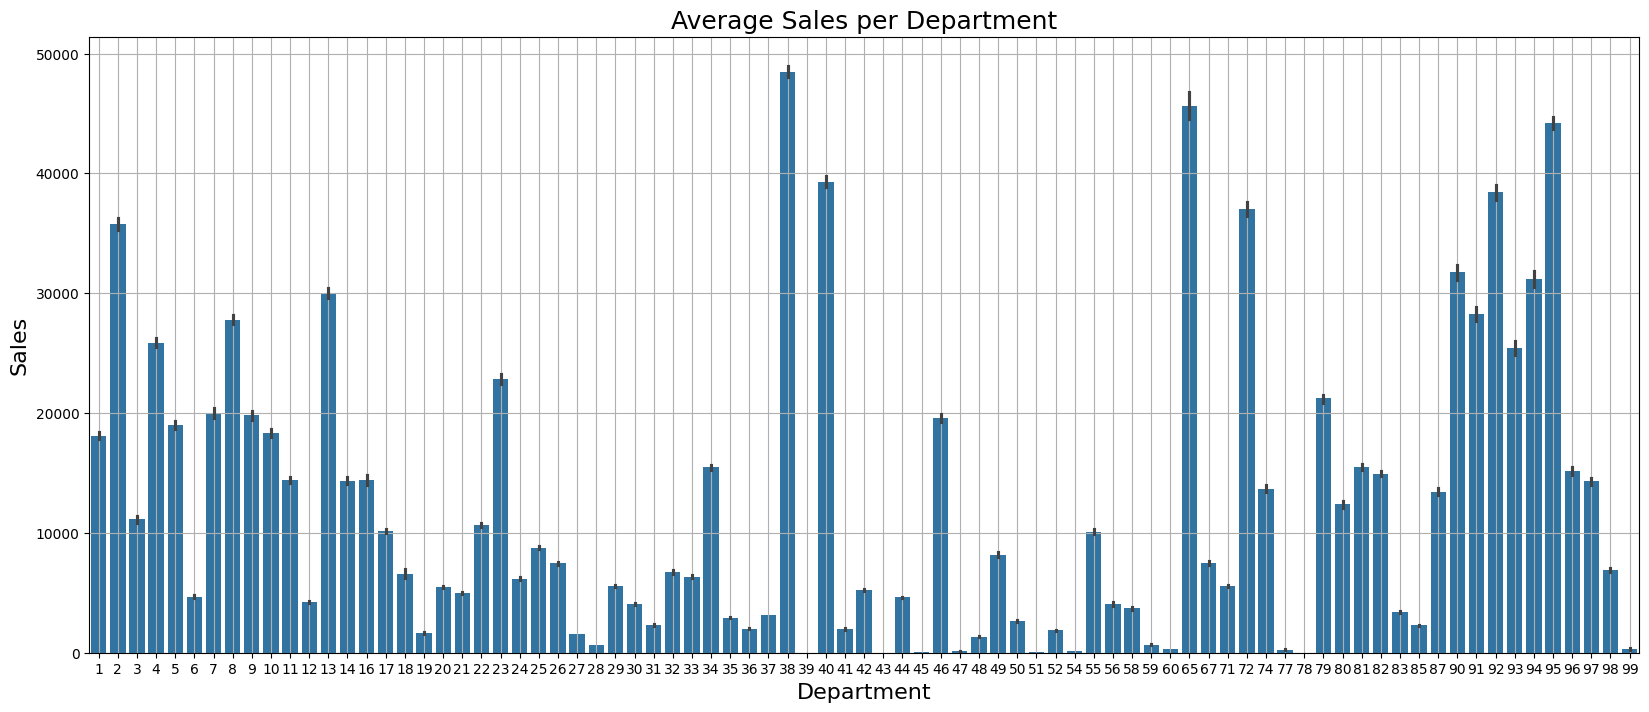

In [62]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.savefig('plots/avg_sales_dept.png')
plt.show()

**Sales Vs Temperature**

C:\Users\Khoe\AppData\Local\Temp\ipykernel_25500\926730452.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])


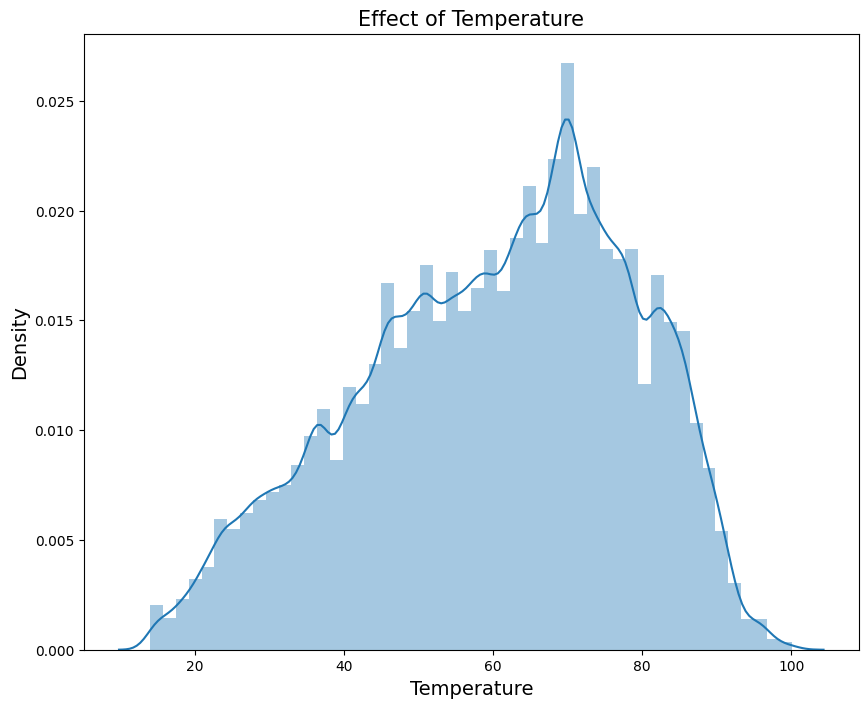

In [63]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
# plt.savefig('plots/effect_of_temp.png')
plt.show()

**Holiday Distribution**

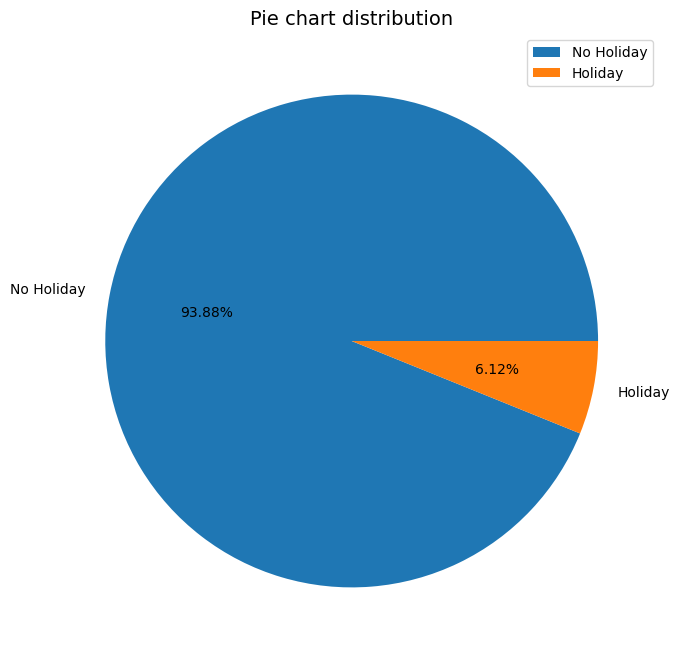

In [64]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.savefig('plots/holiday_distribution.png')
plt.show()

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374247 entries, 2010-02-05 to 2012-10-26
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           374247 non-null  int64         
 1   Dept            374247 non-null  int64         
 2   Date            374247 non-null  datetime64[ns]
 3   Weekly_Sales    374247 non-null  float64       
 4   Type            374247 non-null  object        
 5   Size            374247 non-null  int64         
 6   Temperature     374247 non-null  float64       
 7   Fuel_Price      374247 non-null  float64       
 8   CPI             374247 non-null  float64       
 9   Unemployment    374247 non-null  float64       
 10  IsHoliday       374247 non-null  int32         
 11  Year            374247 non-null  int32         
 12  Month           374247 non-null  int32         
 13  Week            374247 non-null  UInt32        
 14  max             3742

In [66]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


In [67]:
data['Weekly_Sales'].resample('MS').mean()

Date
2010-02-01    12982.188903
2010-03-01    12860.002255
2010-04-01    13198.217984
2010-05-01    13505.567954
2010-06-01    13859.192379
2010-07-01    13490.387520
2010-08-01    13598.168533
2010-09-01    12673.492002
2010-10-01    12654.306310
2010-11-01    13662.570075
2010-12-01    14854.987602
2011-01-01    11709.258948
2011-02-01    12969.927620
2011-03-01    12573.438159
2011-04-01    12835.344305
2011-05-01    12934.929940
2011-06-01    13639.803456
2011-07-01    13327.628560
2011-08-01    13202.485475
2011-09-01    12492.756861
2011-10-01    12860.291102
2011-11-01    12501.893056
2011-12-01    14307.041266
2012-01-01    11291.999173
2012-02-01    11853.862162
2012-03-01    12756.526013
2012-04-01    12993.869275
2012-05-01    13285.429147
2012-06-01    13566.754192
2012-07-01    13176.302849
2012-08-01    12903.535644
2012-09-01    12575.536375
2012-10-01    12895.541687
Freq: MS, Name: Weekly_Sales, dtype: float64

#**Time Series Decompose**

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/colab_projects/project_walmart/plots/seasonal_decompose.png'

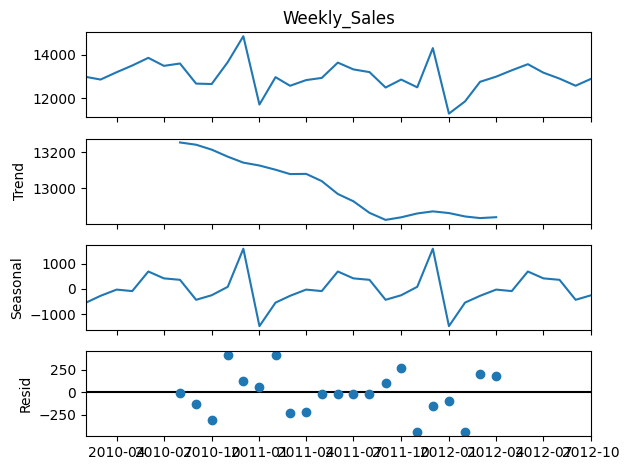

In [68]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.savefig('/content/drive/MyDrive/colab_projects/project_walmart/plots/seasonal_decompose.png')
plt.show()

# **One-hot-encoding**

In [ ]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [ ]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [ ]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data.shape

(374247, 20)

In [ ]:
data = pd.concat([data, data_cat],axis=1)

In [ ]:
data.shape

(374247, 149)

In [ ]:
data.drop(columns=cat_col,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374247 entries, 2010-02-05 to 2012-10-26
Columns: 146 entries, Date to Type_C
dtypes: UInt32(1), datetime64[ns](1), float64(11), int64(4), uint8(129)
memory usage: 96.4 MB


In [ ]:
data.head()

,Date,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data.drop(columns=['Date'],inplace=True)

In [ ]:
data.shape

(374247, 145)

# **Data Normalization**

In [ ]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [ ]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
# minmax_scale.fit_transform(data[num_col])

In [ ]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data = normalization(data.copy(),num_col)

In [ ]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


# **Recursive Feature Elimination**

In [ ]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

In [ ]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

In [ ]:
# pkl_filename = "/content/drive/MyDrive/colab_projects/project_walmart/models/feature_elim_regressor.pkl"
pkl_filename = "models/feature_elim_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(radm_clf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


In [ ]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,mean,5.462074e-01
1,2,median,3.817612e-01
2,3,Week,1.977488e-02
3,4,Temperature,8.922420e-03
4,5,CPI,5.839159e-03
...,...,...,...
139,140,Dept_51,2.854848e-10
140,141,Dept_45,1.738684e-10
141,142,Dept_78,3.878882e-12
142,143,Dept_43,4.341346e-15


In [ ]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['mean', 'median', 'Week', 'Temperature', 'CPI', 'max', 'Fuel_Price', 'min', 'Unemployment', 'std', 'Month', 'Total_MarkDown', 'Dept_16', 'Dept_18', 'IsHoliday', 'Dept_3', 'Size', 'Dept_9', 'Dept_1', 'Dept_11', 'Year', 'Dept_5', 'Dept_56']


In [ ]:
X = data[x]
Y = data['Weekly_Sales']

In [ ]:
data = pd.concat([X,Y],axis=1)

In [ ]:
data

,mean,median,Week,Temperature,CPI,max,Fuel_Price,min,Unemployment,std,...,IsHoliday,Dept_3,Size,Dept_9,Dept_1,Dept_11,Year,Dept_5,Dept_56,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.208157,0.173215,5,0.328495,0.840500,0.088635,0.050100,0.253530,0.508787,0.138276,...,0,0,0.630267,0,1,0,2010,0,0,0.342576
2010-02-05,0.004499,0.004767,5,0.278565,0.875680,0.001180,0.050100,0.064648,0.305248,0.004083,...,0,0,0.492338,0,0,0,2010,0,0,0.009188
2010-02-05,0.009135,0.008968,5,0.278565,0.875680,0.003866,0.050100,0.066212,0.305248,0.004314,...,0,0,0.492338,0,0,0,2010,0,0,0.009537
2010-02-05,0.085594,0.086290,5,0.233627,0.873861,0.018453,0.050100,0.161046,0.291286,0.010611,...,0,0,0.650636,0,0,0,2010,0,0,0.118953
2010-02-05,0.080242,0.071542,5,0.278565,0.875680,0.044887,0.050100,0.126993,0.305248,0.054362,...,0,0,0.492338,0,0,0,2010,0,0,0.152888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.087055,0.082590,43,0.647585,0.958935,0.030286,0.518036,0.119050,0.275758,0.039642,...,0,0,0.906277,0,0,0,2012,0,0,0.127259
2012-10-26,0.001419,0.001617,43,0.602996,0.050698,0.000446,0.916333,0.064822,0.760713,0.000478,...,0,0,0.026063,0,0,0,2012,0,0,0.000730
2012-10-26,0.072181,0.064375,43,0.522178,0.165055,0.063107,0.801102,0.097548,0.496028,0.072670,...,0,0,0.916437,0,0,0,2012,0,0,0.073391


In [ ]:
# data.to_csv('/content/drive/MyDrive/colab_projects/project_walmart/datasets/final_data.csv')
data.to_csv('datasets/final_data.csv')

# **Data Splitted into Training, Validation, Test**

In [ ]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

In [ ]:
X_train, y_train = X_train.sort_index(), y_train.sort_index()

In [ ]:
X_train, y_train = tf.convert_to_tensor(X_train.values, dtype=tf.float32), tf.convert_to_tensor(y_train.values, dtype=tf.float32)

In [ ]:
X_train.shape

TensorShape([299397, 23])

In [ ]:
y_train.shape

TensorShape([299397])

In [ ]:
X_test = tf.convert_to_tensor(X_test.values, dtype=tf.float32)

In [ ]:
X_test.shape

TensorShape([74850, 23])

In [ ]:
y_test.shape

(74850,)

# **Deep Learning Fully Connected Neural Network**

In [ ]:
def create_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_initializer='normal'))
  model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='normal'))
  model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='normal'))
  model.add(tf.keras.layers.Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [ ]:
model = None
# savedfile = "/content/drive/MyDrive/colab_projects/project_walmart/models/dnn_regressor.keras"
savedfile = "models/dnn_regressor.keras"
if (not path.isfile(savedfile)):
  model = tf.keras.saving.load_model(savedfile)
else:
  model = create_model()
  model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=5000)

In [ ]:
y_pred = model.predict(X_test)

2340/2340 [==============================] - 6s 3ms/step


In [ ]:
y_pred = y_pred.reshape(-1)

In [ ]:
y_pred.shape

(74850,)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.034404553350260214
MSE 0.003623129341667062
RMSE 0.060192435917373055
R2 0.9213069725073613


In [ ]:
dnn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# dnn_df.to_csv('/content/drive/MyDrive/colab_projects/project_walmart/predictions/dnn_real_pred.csv')
dnn_df.to_csv('predictions/dnn_real_pred.csv')
dnn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.129563
2010-07-09,0.364278,0.288913
2011-07-01,0.005003,0.032309
2012-01-06,0.015856,0.028396
2011-08-26,0.000318,0.013270
...,...,...
2011-01-28,0.169068,0.230894
2010-08-20,0.252860,0.245832
2010-11-26,0.265617,0.351392


4/4 [==============================] - 0s 5ms/step


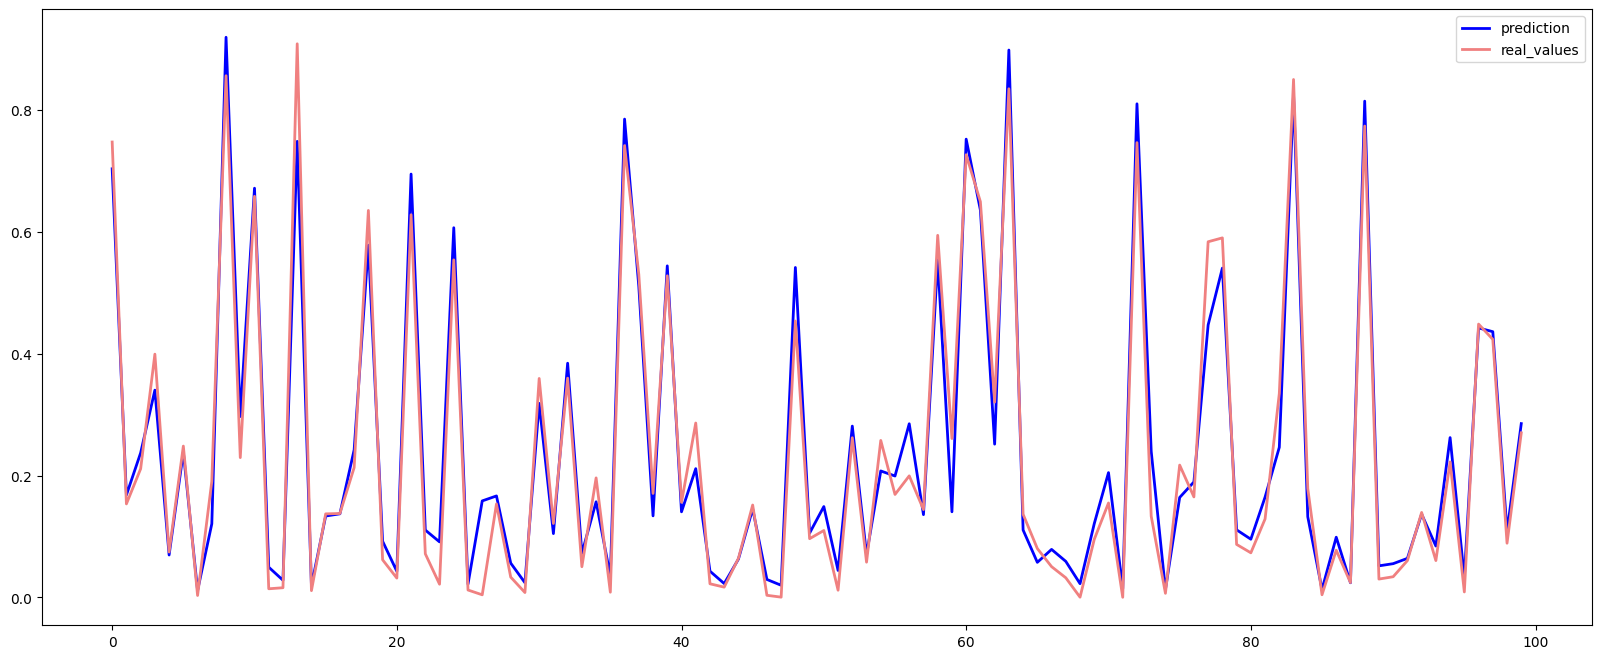

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(model.predict(X_test[200:300]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0,color='lightcoral')
# plt.savefig('/content/drive/MyDrive/colab_projects/project_walmart/plots/dnn_real_pred.png')
plt.savefig('plots/dnn_real_pred.png')
plt.legend(loc="best")

In [ ]:
# savepath = '/content/drive/MyDrive/colab_projects/project_walmart/models/dnn_regressor.keras'
savepath = 'models/dnn_regressor.keras'
if (not path.isfile(savepath)):
  model.save(savepath)
else:
  print("Model already saved")


# **Comparing Models**

In [ ]:
# acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc','dnn_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc,dnn_acc]}

In [ ]:
# acc_df = pd.DataFrame(acc)
# acc_df

,model,accuracy
0,lr_acc,92.280797
1,rf_acc,97.889071
2,knn_acc,91.972603
3,xgb_acc,94.211523
4,dnn_acc,90.503287


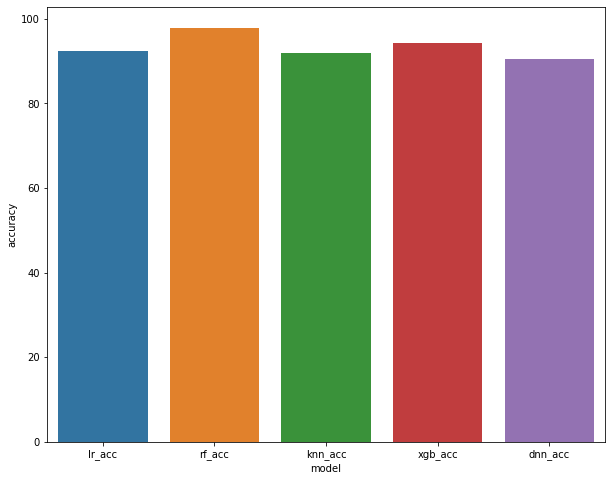

In [ ]:
# plt.figure(figsize=(10,8))
# sns.barplot(x='model',y='accuracy',data=acc_df)
# plt.savefig('plots/compared_models.png')
# plt.show()